# 2. The forecaster's toolbox

In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, plot_acf, plot_pacf

for file_name in os.listdir('data'):
    if file_name.endswith('pkl'):
        df = pd.read_pickle( os.path.join('data',file_name) )
        exec("%s=df"%file_name.split(".")[0])


## 2.1. Graphics
### Time Plots

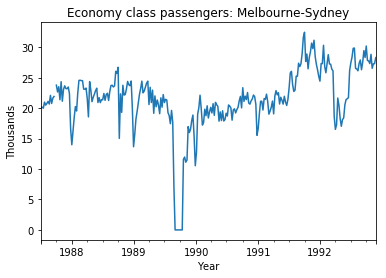

In [14]:
ax = melsyd['Economy.Class'].plot(title='Economy class passengers: Melbourne-Sydney')#
ax.set_xlabel('Year')
ax.set_ylabel('Thousands')
plt.show()


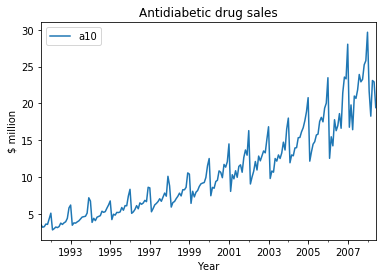

In [15]:
ax = a10.plot(title='Antidiabetic drug sales')
ax.set_xlabel('Year')
ax.set_ylabel('$ million')
plt.show()


### Seasonal plots

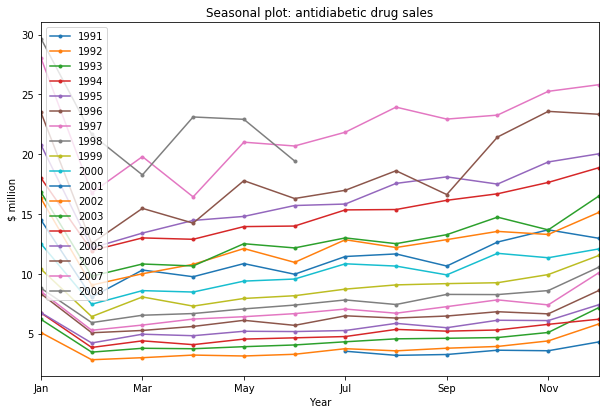

In [16]:
a10_pv = pd.pivot_table(a10, index=a10.index.month, columns=a10.index.year, values='a10', aggfunc='sum')
a10_pv.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax = a10_pv.plot(title="Seasonal plot: antidiabetic drug sales", figsize=(10,6.5), marker='.')
ax.set_xlabel('Year')
ax.set_ylabel('$ million')
plt.show()


### Seasonal subseries plots

/Users/johannestebalokokozela/anaconda3/lib/python3.6/site-packages/statsmodels/graphics/tsaplots.py:190: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  df.sort()


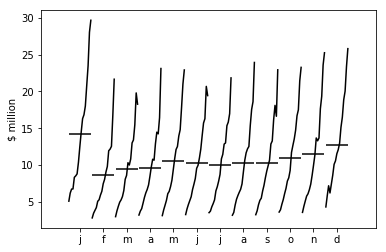

In [17]:
import statsmodels.api as sm
fig = sm.graphics.tsa.month_plot(a10, ylabel='$ million')
plt.show()


### Scatterplots

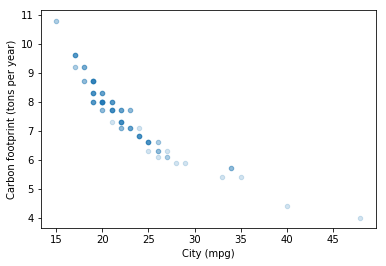

In [18]:
ax = fuel.plot.scatter(y='Carbon', x='City', alpha=0.2)
ax.set_xlabel('City (mpg)')
ax.set_ylabel('Carbon footprint (tons per year)')
plt.show()


### Scatterplots matrices

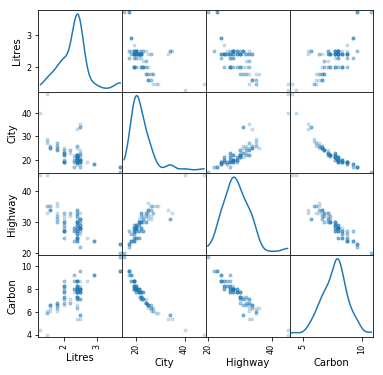

In [19]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(fuel[[2,4,5,7]], alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()


## 2.2 Numerical data summaries

### Univariate statistics

In [20]:
fuel2 = fuel[fuel.Litres<2]
print(fuel2["Carbon"].describe())
print(fuel2["Carbon"].std())


count    20.0000
mean      6.2000
std       0.7441
min       4.0000
25%       6.1000
50%       6.4500
75%       6.6000
max       6.8000
Name: Carbon, dtype: float64
0.7440995971819335


### Bivariate statistics

In [21]:
print(fuel[['City','Carbon']].corr())


            City    Carbon
City    1.000000 -0.907941
Carbon -0.907941  1.000000


### Autocorrelation

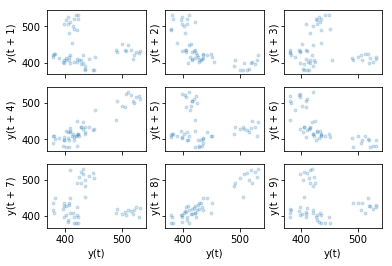

In [22]:
from pandas.tools.plotting import lag_plot
beer2 = ausbeer['1992-01-01':'2005-12-31']
ax1 = None
for i in range(1,10):
        ax1 = plt.subplot(3,3,i, sharex=ax1, sharey=ax1)
        ax2 = lag_plot(beer2, lag=i, marker='.', alpha=0.2)
        if i in [1,2,3,4,5,6]:
            plt.setp(ax2.get_xticklabels(), visible=False)
            ax2.set_xlabel('')
        if i in [2,3,5,6,8,9]:
            plt.setp(ax2.get_yticklabels(), visible=False)
plt.show()


In [23]:
ausbeer[:10]

,ausbeer
1956-01-01,284.0
1956-04-01,213.0
1956-07-01,227.0
1956-10-01,308.0
1957-01-01,262.0
1957-04-01,228.0
1957-07-01,236.0
1957-10-01,320.0
1958-01-01,272.0
1958-04-01,233.0


In [24]:
beer2[:20]

,ausbeer
1992-01-01,443.0
1992-04-01,410.0
1992-07-01,420.0
1992-10-01,532.0
1993-01-01,433.0
1993-04-01,421.0
1993-07-01,410.0
1993-10-01,512.0
1994-01-01,449.0
1994-04-01,381.0


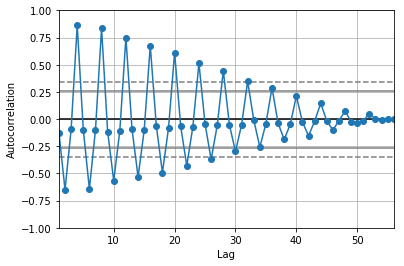

In [25]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(beer2, marker='o')
plt.show()


### White noise

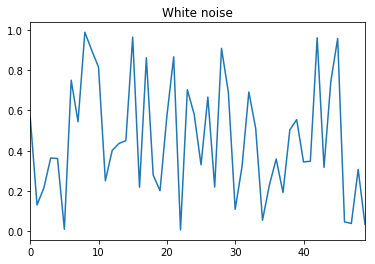

In [12]:
x = pd.Series(np.random.random(50))
x.plot(title="White noise")
plt.show()


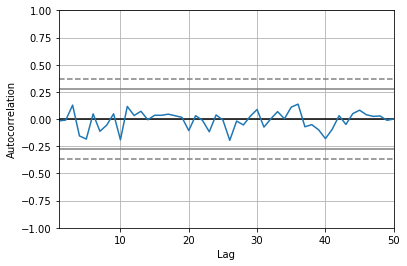

In [13]:
autocorrelation_plot(x)
plt.show()


## 2.3 Some simple forecasting methods

### Average method

In [14]:
def meanf(y, h):
    values = np.ones(h)*y.mean()[0]
    index = y.index.shift(h)[-h:]    
    return pd.Series(values, index=index)


### Naïve method

In [15]:
def naive(y, h):
    values = np.ones(h)*y[-1:].values[0][0]
    index = y.index.shift(h)[-h:] 
    return pd.Series(values, index=index)


### Seasonal naïve method

In [16]:
def snaive(y, h):
    period = {'QS-JAN':4,'M':12,'D':365}[y.index.freqstr]
    index = y.index.shift(h)[-h:]
    temp = pd.Series( [0]*h, index=index)
    for i in range(h):
        temp.iloc[i] = y.iloc[-period:].values.T[0][i%period]
    return temp


### Drift method

In [17]:
def drift(y, h):
    temp = [y.values.T[0][-1]+hi*(y.values.T[0][-1]-y.values.T[0][0])/(len(y)-1) for hi in range(1,h+1)]
    index = y.index.shift(h)[-h:]
    return pd.Series(temp, index=index)


### Examples

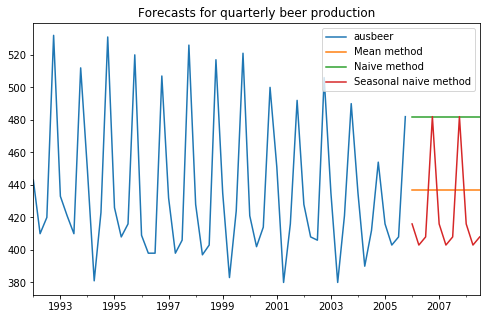

In [18]:
beerfit1 = meanf(beer2, 11)
beerfit2 = naive(beer2, 11)
beerfit3 = snaive(beer2, 11)
ax = beer2.plot(title="Forecasts for quarterly beer production", figsize=(8,5))
beerfit1.plot(ax=ax, label='Mean method')
beerfit2.plot(ax=ax, label='Naive method')
beerfit3.plot(ax=ax, label='Seasonal naive method')
plt.legend(loc='upper right')
plt.show()


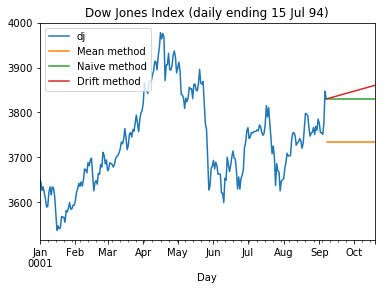

In [19]:
dj2 = dj.iloc[:250]
ax = dj2.plot(title="Dow Jones Index (daily ending 15 Jul 94)", )
ax.set_xlabel('Day')
meanf(dj2,h=42).plot(ax=ax, label='Mean method')
naive(dj2,h=42).plot(ax=ax, label='Naive method')
drift(dj2,h=42).plot(ax=ax, label='Drift method')
plt.legend(loc="upper left")
plt.show()


## 2.4 Transformations and adjustments

### Mathematical transformations

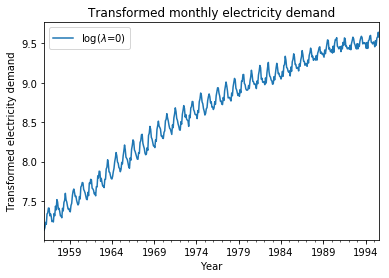

In [27]:
from scipy.stats import boxcox
elec2 = elec.copy()
lam6da = 0
xt = boxcox(elec2.elec, lam6da)
elec2['log($\lambda$=%s)'%lam6da] = xt
ax = elec2[['log($\lambda$=%s)'%lam6da]].plot(title="Transformed monthly electricity demand")
ax.set_xlabel("Year")
ax.set_ylabel("Transformed electricity demand")
plt.show()

In [29]:
xt[:10]

array([ 7.13409372,  7.1623975 ,  7.22911388,  7.20489251,  7.33628566,
        7.34923082,  7.41155629,  7.40913644,  7.31322039,  7.33823815])

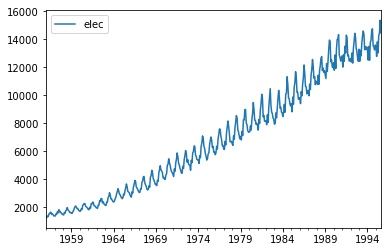

In [31]:
elec.plot()
plt.show()

In [35]:
elec2['elec'][:10]

1956-01-01    1254.0
1956-02-01    1290.0
1956-03-01    1379.0
1956-04-01    1346.0
1956-05-01    1535.0
1956-06-01    1555.0
1956-07-01    1655.0
1956-08-01    1651.0
1956-09-01    1500.0
1956-10-01    1538.0
Freq: MS, Name: elec, dtype: float64

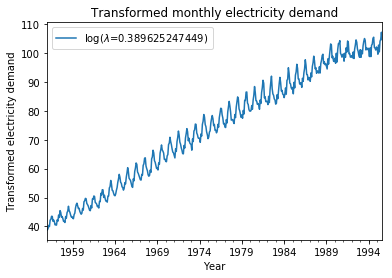

In [21]:
xt, lam6da = boxcox(elec2.elec)
elec2['log($\lambda$=%s)'%lam6da] = xt
ax = elec2[['log($\lambda$=%s)'%lam6da]].plot(title="Transformed monthly electricity demand")
ax.set_xlabel("Year")
ax.set_ylabel("Transformed electricity demand")
plt.show()

### Calendar adjustments

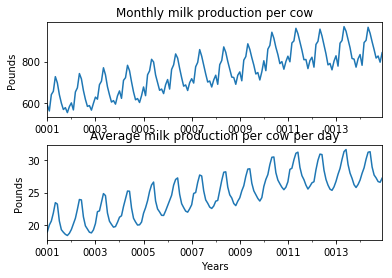

In [22]:
_, ax = plt.subplots(2,1)
plt.subplots_adjust(wspace=0.0, hspace=0.3);
milk.plot(ax=ax[0], title="Monthly milk production per cow", legend=False)
#ax[0].set_xlabel("Years")
ax[0].set_ylabel("Pounds")
(milk.milk/milk.index.days_in_month).plot(ax=ax[1], title="Average milk production per cow per day")
ax[1].set_xlabel("Years")
ax[1].set_ylabel("Pounds")
plt.show()


## 2.5 Evaluating forecast accuracy
### Forecast accuracy measures

In [23]:
def accuracy(y_cap, y, y_train,is_ts=True, is_seasonal=True):
    e = y-y_cap
    RMSE = (e**2.).mean()**0.5
    MAE = e.abs().mean()
    MAPE = (100.*e/y).abs().mean()
    q = e/((y_train-y_train.shift({'QS-JAN':4,'M':12,'W':52,'D':365}[y_train.index.freqstr])).abs()).mean() if is_ts and is_seasonal else \
        e/((y_train-y_train.shift(1)).abs()).mean() if is_ts else \
        e/((y_train-y_train.mean()).abs()).mean()
    MASE = q.abs().mean()
    return RMSE, MAE, MAPE, MASE


### Examples

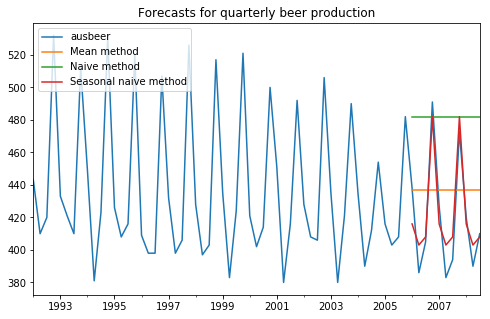

In [24]:
beer3 = ausbeer.ausbeer['2006-1-1':]
ax = ausbeer['1992-01-01':].plot(title="Forecasts for quarterly beer production", figsize=(8,5))
beerfit1.plot(ax=ax, label='Mean method')
beerfit2.plot(ax=ax, label='Naive method')
beerfit3.plot(ax=ax, label='Seasonal naive method')
plt.legend(loc='upper left')
plt.show()

In [25]:
ausbeer_results = pd.DataFrame(columns=['RMSE', 'MAE', 'MAPE', 'MASE'])
ausbeer_results.loc['Mean method'] = accuracy(beerfit1, beer3, beer2.ausbeer)
ausbeer_results.loc['Naive method'] = accuracy(beerfit1, beer3, beer2.ausbeer)
ausbeer_results.loc['Seasonal Naive method'] = accuracy(beerfit1, beer3, beer2.ausbeer)

ausbeer_results

,RMSE,MAE,MAPE,MASE
Mean method,38.014542,33.777597,8.169955,2.298999
Naive method,38.014542,33.777597,8.169955,2.298999
Seasonal Naive method,38.014542,33.777597,8.169955,2.298999


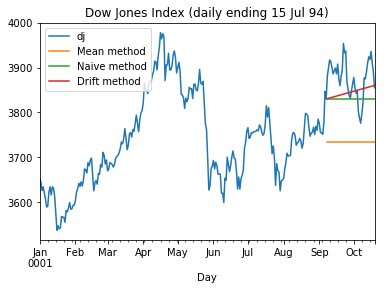

In [26]:
dj2 = dj.iloc[:250]
ax = dj.plot(title="Dow Jones Index (daily ending 15 Jul 94)", )
ax.set_xlabel('Day')
meanf(dj2,h=42).plot(ax=ax, label='Mean method')
naive(dj2,h=42).plot(ax=ax, label='Naive method')
drift(dj2,h=42).plot(ax=ax, label='Drift method')
plt.legend(loc="upper left")
plt.show()


In [27]:
dj3 = dj.dj[250:]
dj_results = pd.DataFrame(columns=['RMSE', 'MAE', 'MAPE', 'MASE'])
dj_results.loc['Mean method'] = accuracy(meanf(dj2,42), dj3, dj2.dj,  is_seasonal=False)
dj_results.loc['Naive method'] = accuracy(naive(dj2,42), dj3, dj2.dj,  is_seasonal=False)
dj_results.loc['Drift method'] = accuracy(drift(dj2,42), dj3, dj2.dj,  is_seasonal=False)
dj_results


,RMSE,MAE,MAPE,MASE
Mean method,148.235739,142.418476,3.663046,8.698111
Naive method,62.028459,54.440476,1.397937,3.324915
Drift method,53.697667,45.727434,1.175775,2.792772


## 2.6 Residual diagnostics
### Example: Forecasting the Dow-Jones Index

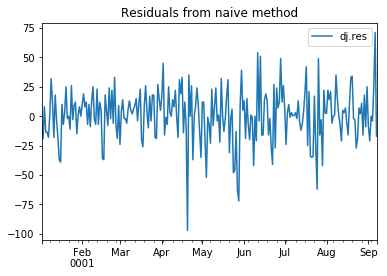

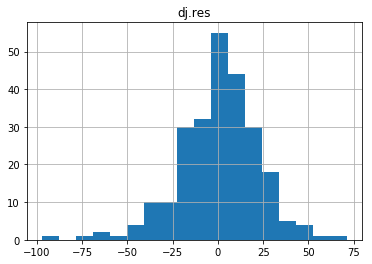

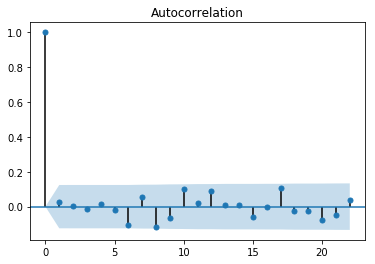

In [28]:
res = (dj2 - dj2.shift(1))[1:]
res.rename(columns={'dj':'dj.res'}, inplace=True)
res.plot(title='Residuals from naive method')
plt.show()
res.hist(bins=18)
plt.show()
plot_acf(res, lags=22)
plt.show()

In [29]:
from statsmodels.stats.diagnostic import acorr_ljungbox
box_test = pd.DataFrame(columns=[])
lbvalue, lbpvalue, bpvalue, bppvalue = acorr_ljungbox(res, lags=10, boxpierce=True)

### Portmanteau tests for autocorrelation

In [30]:
print('Box-Pierce test\n \t X-squared = %s, p-value = %s'%(bpvalue[-1], bppvalue[-1]) ) 
print('Box-Ljung test \n \t X-squared = %s, p-value = %s'%(lbvalue[-1], lbpvalue[-1]) )

Box-Pierce test
 	 X-squared = 10.6548134397, p-value = 0.385035702854
Box-Ljung test 
 	 X-squared = 11.0879305161, p-value = 0.350708584137


## 2.7 Prediction intervals